In [41]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [42]:
import pandas as pd

data = {
    'length': bream_length + smelt_length,
    'weight': bream_weight + smelt_weight,
    'class': [1]*len(bream_length) + [0]*len(smelt_length)
}

df = pd.DataFrame(data)
df.head()

,length,weight,class
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


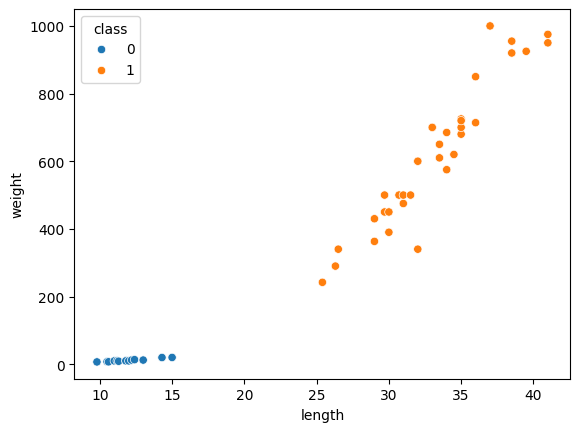

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='length', y='weight', hue='class', data=df)
plt.show()

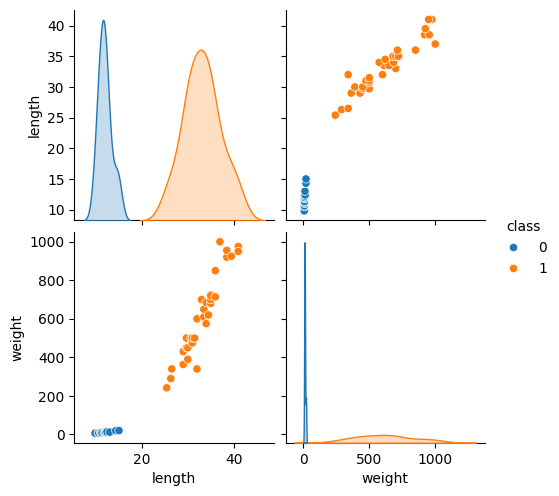

In [44]:
sns.pairplot(df, hue='class')

$$d(x, xi) = \sqrt{\sum{j=1}^{m} (xj - x{i,j})^2}$$

# 유클리드 거리
```
피타고라스의 정리를 기반으로 두점사이의 직선의 거리(최단거리)를 계산
p(x1, y1) p(x2,y2)
x축 거리의 차이 = x변화량
y 거리의 차이 = y변화량
직각삼각형의 빗변의 역활
```

$$ d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

```
이걸 n차원으로 확장하면
각 좌표마다 차이 계산 xi = xi-yi
모든 차원의 거리 차이를 피타고라스 정리에 적용


```

In [45]:
# A( 1,2,3 ) B(4,6,8)
# x 좌표 차이 4-1 = 3
# y 좌표 차이 6-2 = 4
# z 좌표 차이 8-3 = 5
# 유클리드 거리 적용
# d(A,B)  np.sqrt(9 + 16 +25  ) = np.sqrt(50)  대략 7.xxxxxxxxx

# 유클리드거리 응용
# 최근접이웃, k-평균 클러스터, 이미지처리(색상간 거리 계산), 추천시스템 - 유저간 유사도

In [46]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# X, y 데이터 분리
X = df.drop('class', axis=1)
y = df['class']
kn.fit(X, y)   # 모델 학습
kn.score(X, y)  # 모델 평가

1.0

In [47]:
(kn.predict(X) == y).sum() / len(y)

np.float64(1.0)

# 새로운 생성을 예측

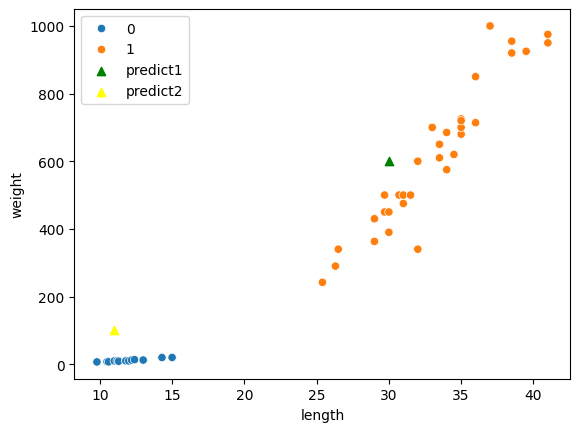

예측은 :  [1]
예측은 :  [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [56]:
# 길이가 30이고 무게가 600이면 도미? 빙어?
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='length', y='weight', hue='class', data=df)
plt.scatter(30, 600, marker='^',color = 'green',label='predict1')
plt.scatter(11, 100, marker='^',color = 'yellow',label='predict2')
plt.legend()
plt.show()
# 예측
print('예측은 : ',kn.predict([[30, 600]]))
print('예측은 : ',kn.predict([[11, 100]]))

In [49]:
# knn의 알고리즘의 n_neibors의 값을 전체 데이터로 하면
# 이웃은 가장 거리가 가까운 데이터부터 찾는데.. 전체로하면 전체의 속성을 가지고 다수결을 따른다. (평균)
# 지금처러 샘플링 편향이 있는경우는 이런 유클리드 거리방식의 알고리즘은 정확도가 떨어진다.
kn = KNeighborsClassifier(n_neighbors=len(X))  # 49
kn.fit(X, y)  #  학습
kn.score(X, y)  # 평가

0.7142857142857143

In [50]:
print(len(bream_length), len(smelt_length))
35 / 49

35 14


0.7142857142857143

In [51]:
14/49,  35/49

(0.2857142857142857, 0.7142857142857143)

# 데이터 섞기
```
클래스 불균형이 거의 대다수차지하고 있는 현실에서
균형잡히게 학습데이터와 검증용 데이터를 섞는게 중요
이때 클래스간 균형의 비율을 적용해서 섞어야 정확함
```

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.3)
print(X_train.shape, X_test.shape)
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

# 평가
kn.score(X_train, y_train), kn.score(X_test, y_test)

(34, 2) (15, 2)


(1.0, 1.0)

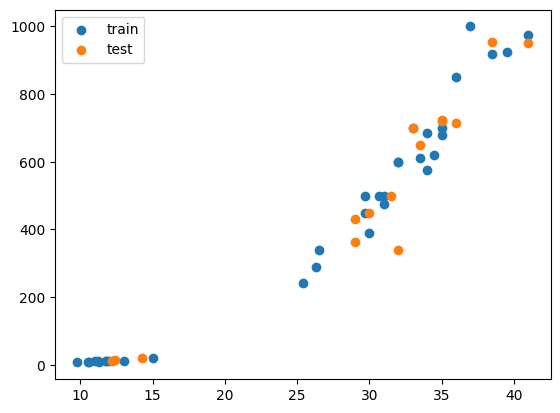

In [66]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],label = 'train')
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], label = 'test')
plt.legend()
plt.show()

# 데이터를 클래스비율을 고려해서 섞기
```
train_test_split 의 옵션을 stratify=y 적용
```

(36, 2) (13, 2)


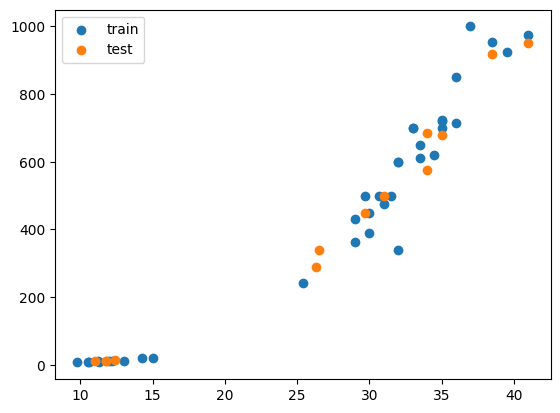

In [68]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,stratify=y)
print(X_train.shape, X_test.shape)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],label = 'train')
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], label = 'test')
plt.legend()
plt.show()

# IRIS 붓꽃 데이터의 품질을 예측  3종류...

In [70]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [71]:
import numpy as np
np.unique( iris.target),   len(iris.target == 0),len(iris.target == 1),len(iris.target == 2)

(array([0, 1, 2]), 150, 150, 150)

In [72]:
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42, stratify=y )
# k최근접으로

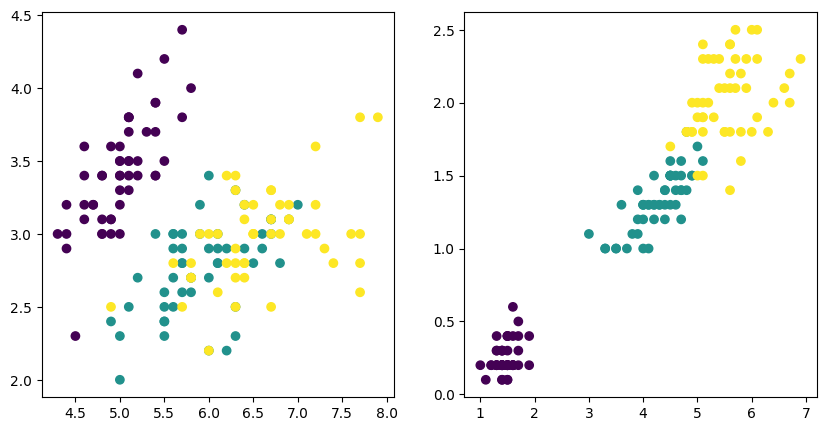

In [75]:
X = iris.data
y = iris.target
# 시각화
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.subplot(1,2,2)
plt.scatter(X[:,2], X[:,3], c=y)
plt.show()

# 머신러닝 적용순서
```
데이터의 특성및 목표에 따라서 분류와 회귀를 정함
데이터 전처리작업(결측치, 이상치, 피처엔지니어링(특성공학))
적합한 모델 선택
모델훈련
모델 평가
만약 평가가 안좋으면 모델의 파라메터를 조정해서 다시 학습-평가를 반복
그래도 안좋으면... 이번에는 다른 모델로 평가
결론 : 최적의 모델과 해당 모델의 최적의 파라메터값을 찾아서 모델을 생성 배포
```

In [76]:
# 데이터을 수집( iris)
# 데이터를 분할(학습 / 평가)
# 모델선택(k neigbors)
# 학습데이터로 학습
# 학습데이터와 평가용데이터로 모델의 예측 정확성을 평가
# 만약에. .학습데이터는 성능이 좋은데 평가용은 성능이 낮다면.. 이건 바로 과적합

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_tr, X_val, y_tr, y_val = train_test_split(X,y, random_state=42, stratify=y,test_size=0.3)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)
kn = KNeighborsClassifier()
kn.fit(X_tr, y_tr)
pred = kn.predict(X_val)
accuracy_score(pred, y_val)

(105, 4) (45, 4) (105,) (45,)


0.9777777777777777

In [116]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()
X = cancer.get('data')
y = cancer.get('target')
print(X.shape, y.shape)

(569, 30) (569,)


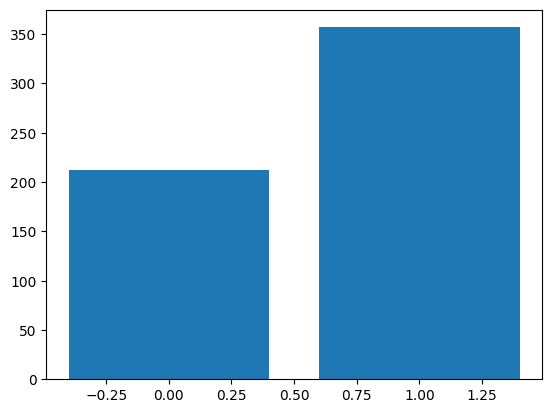

In [115]:
a,b = np.unique(cancer.target, return_counts=True)
plt.bar(a,b)
plt.show()

In [117]:
X_tr, X_val, y_tr, y_val = train_test_split(X,y,random_state=42, stratify=y, test_size=0.3)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

kn = KNeighborsClassifier()
kn.fit(X_tr, y_tr)
pred = kn.predict(X_val)
accuracy_score(pred, y_val)

(398, 30) (171, 30) (398,) (171,)


0.9239766081871345

In [118]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_tr, y_tr)
pred = rfc.predict(X_val)
accuracy_score(pred, y_val)

0.9473684210526315

In [119]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_val)
accuracy_score(pred, y_val)

0.9649122807017544

In [123]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.keys())
X = wine.get('data')
y = wine.get('target')

X_tr, X_val, y_tr, y_val = train_test_split(X,y, random_state=42, stratify=y, test_size=0.3)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
(124, 13) (54, 13) (124,) (54,)


In [134]:
kn = KNeighborsClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

for model in [kn, rfc, xgb]:
  model.fit(X_tr, y_tr)
  pred = model.predict(X_val)
  print(model.score(X_tr, y_tr), model.score(X_val, y_val))

0.8064516129032258 0.7222222222222222
1.0 1.0
1.0 1.0


In [135]:
# SMOTE 이용한 샘플링 편향 조정
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X, y)
print(np.unique(y_train_over, return_counts=True))
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42, stratify = wine.target)

# 모델 선택
kn = KNeighborsClassifier(n_neighbors=5)
# 학습
kn.fit(X_train, y_train)
# 평가
kn.score(X_train, y_train), kn.score(X_test, y_test)

(array([0, 1, 2]), array([71, 71, 71]))


(0.7894736842105263, 0.7777777777777778)

In [136]:
!pip install ucimlrepo

In [137]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [144]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB


In [152]:
cols = X.describe(include='O').columns


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [164]:
from sklearn.preprocessing import LabelEncoder
Xdf = pd.DataFrame(X)
le = LabelEncoder()
for col in cols:
  Xdf[col] = le.fit_transform(Xdf[col])

X_tr, X_val, y_tr, y_val = train_test_split(Xdf,y.iloc[:,2],random_state=42)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

kn.fit(X_tr, y_tr)
kn.score(X_tr, y_tr), kn.score(X_val, y_val)

(486, 30) (163, 30) (486,) (163,)


(0.35185185185185186, 0.10429447852760736)

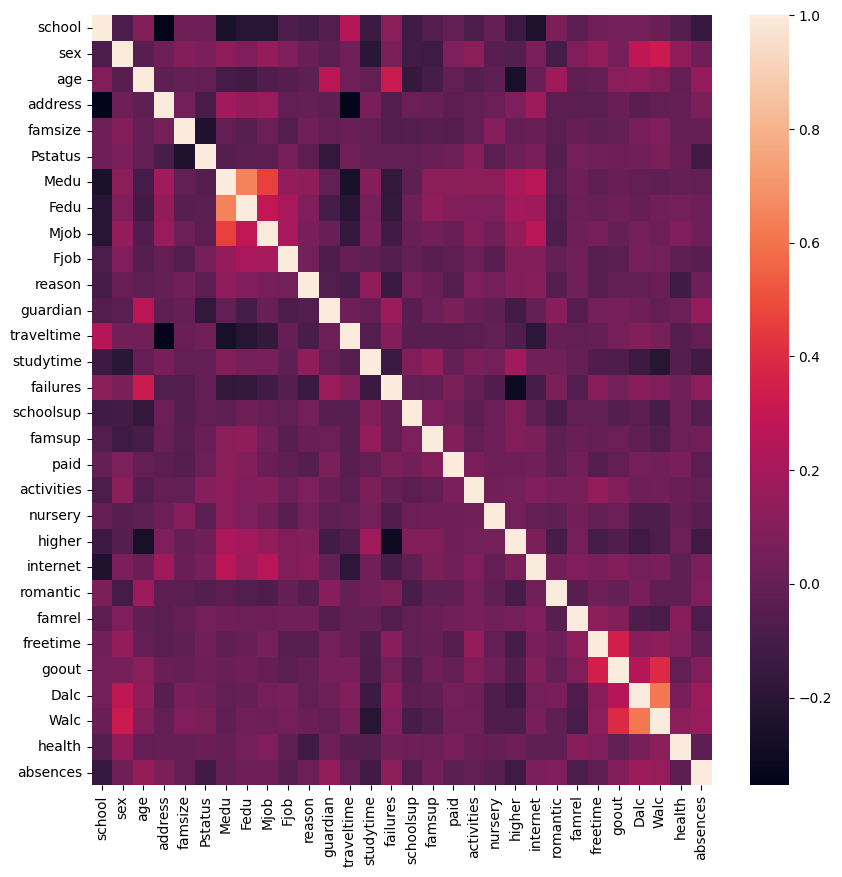

In [160]:
corr = Xdf.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

# 표준화 스케일링

In [165]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import pandas as pd

data = {
    'length': bream_length + smelt_length,
    'weight': bream_weight + smelt_weight,
    'class': [1]*len(bream_length) + [0]*len(smelt_length)
}

df = pd.DataFrame(data)
df.head()

,length,weight,class
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


[0]


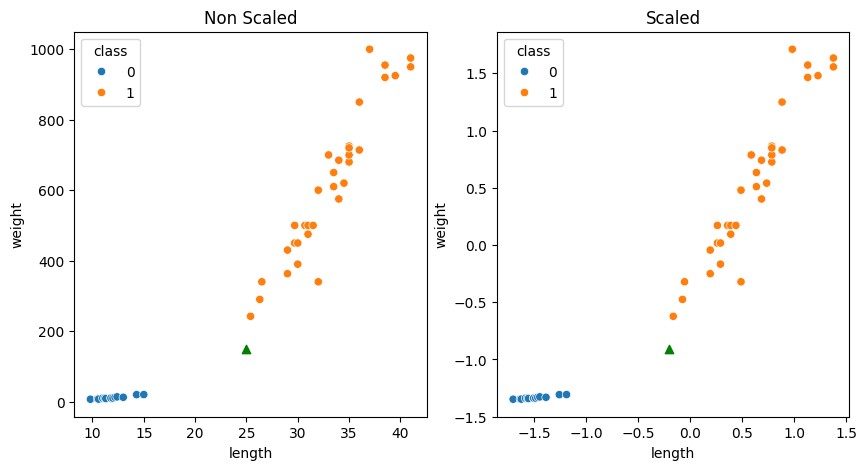

[1]


In [171]:
# 25,150 의 품종 예측
# 전체 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  #평균이 0 표준편차가 1로 데이터를 표준화
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(10,5))
# 비표준화
plt.subplot(1,2,1)
plt.title("Non Scaled")
sns.scatterplot(x='length', y='weight', hue='class', data=df)
plt.scatter(25, 150, marker='^',color = 'green',label='predict')
non_Scaled_Knn = KNeighborsClassifier()
non_Scaled_Knn.fit(df[['length','weight']].to_numpy(), df['class'].to_numpy())
print(non_Scaled_Knn.predict([[25,150]]))  # 0 빙어  1 도미



# 표준화
df2 = df.copy()
scaler = StandardScaler()
scaler.fit(df2[['length','weight']].to_numpy())
df2[['length','weight']] = scaler.transform(df2[['length','weight']].to_numpy())
plt.subplot(1,2,2)
plt.title("Scaled")
sns.scatterplot(x='length', y='weight', hue='class', data=df2)
p = scaler.transform([[25,150]])
plt.scatter(p[:,0],p[:,1], marker='^',color = 'green',label='predict')
plt.show()

Scaled_Knn = KNeighborsClassifier()
Scaled_Knn.fit(df2[['length','weight']].to_numpy(), df2['class'].to_numpy())
print(Scaled_Knn.predict([[25,150]]))  # 0 빙어  1 도미


In [172]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.keys())
X = wine.get('data')
y = wine.get('target')

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


# EDA ▶ 모델선택 ▶ 학습 ▶ 평가
```
EDA
  전처리
    결측치  isna(), info()
    이상치  boxplot, describe()
    표준화 - StandardScaler
  피처엔지니어링
    새로운 특성을 추가(날자 ->년 월 일, 주말, 연속형 데이터를->구간분리(범주형)
모델
  학습용, 검증용 분리 🦖 train_test_split
  KNeighborsClassifier    
```

In [324]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [325]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4]), array([164,  55,  36,  35,  13]))

In [326]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [327]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [328]:
df = pd.concat([X,y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [329]:
# 결측치 제거
df.dropna(inplace=True)

# 이상치 제거
for col in X.describe().columns:
  Q3 = df[col].quantile(.75)
  Q1 = df[col].quantile(.25)
  IQR = Q3 -Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  df = df[(df[col] <= upper ) & (df[col] >= lower)]

df.info()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 2 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    float64
 12  thal      212 non-null    float64
 13  num       212 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 24.8 KB


In [330]:
# 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
res = ss.fit_transform(X)

# 데이터 분할
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
X_tr, X_val, y_tr, y_val = train_test_split(res, y, random_state=42, stratify=y)
xgb = XGBClassifier()
rfc = RandomForestClassifier()
xgb.fit(X_tr,y_tr)
rfc.fit(X_tr,y_tr)
print(xgb.score(X_tr,y_tr), xgb.score(X_val, y_val))
print(rfc.score(X_tr,y_tr), rfc.score(X_val, y_val))

1.0 0.5283018867924528
1.0 0.4716981132075472


In [ ]:
# 길이가 주어졌을대 무게를 예측
# 표준화
# 데이터분할(학습 / 평가)
# 모델은 케이 최근접이웃 회귀
# 회귀 평가 (평균제곱오차, 평균 제곱근 오차, 평균 절대 오차, 결정계수 R^2 Score)

평균제곱오차
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

평균절대오차
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$


결정계수
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

```
회귀모델이 데이터를 얼마나잘 설명하는지를 나타냄
1에 가까울수록 좋은 모델, 0이면 평균값만 나태냄(예측불가)
분산을 기준으로 평가하는데 음수가 될수도 있음(엉터리모델)
```

In [388]:
perch_length = np.array(
       [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array(
       [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
        110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
        130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
        197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
        514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
        820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
        1000.0, 1000.0])

In [389]:
# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler  # 평균 0 표준편차 1
X  = perch_length
y = perch_weight
X = np.expand_dims(X, axis=1)
X_train,X_test,y_train,y_test =  train_test_split(X,y)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# 모델
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
knr.score(X_train,y_train), knr.score(X_test,y_test)

(0.977728993973671, 0.9907660906049875)

In [390]:
# 회귀를 평가하는 평가지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(
  mean_absolute_error(y_test, knr.predict(X_test)),
  mean_squared_error(y_test, knr.predict(X_test)),
  r2_score(y_test, knr.predict(X_test))
)

21.91666666666666 881.3115079365083 0.9907660906049875


# 모델사용법
```
1.회귀
  회귀에 맞는 모델선택  
  평가 : 오차(실제값 - 예측한 값)가 적을수록
    mse, mae --> 값 자체가 어느정도 성능은 내는지 알수 없다
    결정개수 : 모델의 설명력을 평가  1에 가까울수록 완벽 모델
2.분류
  분류에 맞는 모델선택
  평가 : 정확성(정답대비 몇개 맞췄는지)
  모델.score()
3.학습
  모델.fit()  
4.예측 모델.predict()  는 모델의 결과값을 나타낸다
유틸리티함수(StandarScaler 등)
함수.fit()  규칙적용
함수.transform() 데이터 변환
두개를 합쳐서 함수.fit_transform()
```

In [382]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [383]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
mms = MinMaxScaler()
ss = StandardScaler()

X_tr, X_val, y_tr, y_val = train_test_split(data,target, random_state=42)

X_trs = ss.fit_transform(X_tr)
X_vals = ss.transform(X_val)

kr = KNeighborsRegressor()
rfr = RandomForestRegressor()

kr.fit(X_trs, y_tr)
rfr.fit(X_trs, y_tr)

print(f'k최근접이웃회귀 평균절대오차 : {mean_absolute_error(y_val, kr.predict(X_vals))}')
print(f'k최근접이웃회귀 평균제곱오차 : {mean_squared_error(y_val, kr.predict(X_vals))}')
print(f'k최근접이웃회귀 결정계수 : {r2_score(y_val, kr.predict(X_vals))}')
print(f'랜덤포레스트회귀 평균절대오차 : {mean_absolute_error(y_val, rfr.predict(X_vals))}')
print(f"랜덤포레스트회귀 평균제곱오차 : {mean_squared_error(y_val, rfr.predict(X_vals))}")
print(f'랜덤포레스트회귀 결정계수 : {r2_score(y_val, rfr.predict(X_vals))}')

k최근접이웃회귀 평균절대오차 : 2.556850393700788
k최근접이웃회귀 평균제곱오차 : 20.14089448818898
k최근접이웃회귀 결정계수 : 0.7123844635500011
랜덤포레스트회귀 평균절대오차 : 2.179440944881891
랜덤포레스트회귀 평균제곱오차 : 10.715364275590558
랜덤포레스트회귀 결정계수 : 0.8469827024719074


In [384]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
cols = ['CRIM',
 'ZN'  ,
 'INDUS',
 'CHAS' ,
 'NOX'  ,
 'RM'   ,
 'AGE'  ,
 'DIS'  ,
 'RAD'  ,
 'TAX'  ,
 'PTRATIO',
 'B'      ,
 'LSTAT'  ,
 ]

df = pd.DataFrame(data, columns=cols)
target = pd.DataFrame(target, columns=['MEDV'])
merged_df = pd.concat([df,target], axis=1)
# 이상치 제거
for col in ['MEDV']:
  Q3 = merged_df[col].quantile(.75)
  Q1 = merged_df[col].quantile(.25)
  IQR = Q3 -Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  merged_df = merged_df[(merged_df[col] <= upper ) & (merged_df[col] >= lower)]

X = merged_df.iloc[:,:-1]
y = merged_df.iloc[:,-1]
mms = MinMaxScaler()
ss = StandardScaler()
X = ss.fit_transform(X)

X_tr, X_val, y_tr, y_val = train_test_split(X,y, random_state=42)

kr = KNeighborsRegressor()
rfr = RandomForestRegressor()

kr.fit(X_tr, y_tr)
rfr.fit(X_tr, y_tr)

print(f'k최근접이웃회귀 평균절대오차 : {mean_absolute_error(y_val, kr.predict(X_val))}')
print(f'k최근접이웃회귀 평균제곱오차 : {mean_squared_error(y_val, kr.predict(X_val))}')
print(f'k최근접이웃회귀 결정계수 : {r2_score(y_val, kr.predict(X_val))}')
print(f'랜덤포레스트회귀 평균절대오차 : {mean_absolute_error(y_val, rfr.predict(X_val))}')
print(f"랜덤포레스트회귀 평균제곱오차 : {mean_squared_error(y_val, rfr.predict(X_val))}")
print(f'랜덤포레스트회귀 결정계수 : {r2_score(y_val, rfr.predict(X_val))}')

k최근접이웃회귀 평균절대오차 : 2.0032478632478625
k최근접이웃회귀 평균제곱오차 : 7.759497435897434
k최근접이웃회귀 결정계수 : 0.7956120561065606
랜덤포레스트회귀 평균절대오차 : 1.8169401709401718
랜덤포레스트회귀 평균제곱오차 : 5.556487452991457
랜덤포레스트회귀 결정계수 : 0.8536401287366017


In [387]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
cols = ['CRIM',
 'ZN'  ,
 'INDUS',
 'CHAS' ,
 'NOX'  ,
 'RM'   ,
 'AGE'  ,
 'DIS'  ,
 'RAD'  ,
 'TAX'  ,
 'PTRATIO',
 'B'      ,
 'LSTAT'  ,
 ]

df = pd.DataFrame(data, columns=cols)
target = pd.DataFrame(target, columns=['MEDV'])
merged_df = pd.concat([df,target], axis=1)
# 이상치 제거
for col in ['MEDV']:
  Q3 = merged_df[col].quantile(.75)
  Q1 = merged_df[col].quantile(.25)
  IQR = Q3 -Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  merged_df = merged_df[(merged_df[col] <= upper ) & (merged_df[col] >= lower)]

mms = MinMaxScaler()
ss = StandardScaler()

X_tr, X_val, y_tr, y_val = train_test_split(merged_df,y, random_state=42)

X_trs = ss.fit_transform(X_tr)
X_vals = ss.transform(X_val)

kr = KNeighborsRegressor()
rfr = RandomForestRegressor()

kr.fit(X_trs, y_tr)
rfr.fit(X_trs, y_tr)

print(f'k최근접이웃회귀 평균절대오차 : {mean_absolute_error(y_val, kr.predict(X_vals))}')
print(f'k최근접이웃회귀 평균제곱오차 : {mean_squared_error(y_val, kr.predict(X_vals))}')
print(f'k최근접이웃회귀 결정계수 : {r2_score(y_val, kr.predict(X_vals))}')
print(f'랜덤포레스트회귀 평균절대오차 : {mean_absolute_error(y_val, rfr.predict(X_vals))}')
print(f"랜덤포레스트회귀 평균제곱오차 : {mean_squared_error(y_val, rfr.predict(X_vals))}")
print(f'랜덤포레스트회귀 결정계수 : {r2_score(y_val, rfr.predict(X_vals))}')

k최근접이웃회귀 평균절대오차 : 1.3996581196581195
k최근접이웃회귀 평균제곱오차 : 3.759418803418803
k최근접이웃회귀 결정계수 : 0.9009755611348771
랜덤포레스트회귀 평균절대오차 : 0.08029914529914614
랜덤포레스트회귀 평균제곱오차 : 0.029742094017094427
랜덤포레스트회귀 결정계수 : 0.9992165825823827
